<a href="https://colab.research.google.com/github/wacfberx/practice_webscraping/blob/main/practice_webscraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from bs4 import BeautifulSoup
from requests import get
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [3]:
# set parameters
term="artificial+intelligence"
page_max = 15 # number of pages to scrape

data = {}

# loop over pages
for page in range(0, page_max):
    url = "https://www.google.com/search?q={}&tbm=nws&sxsrf=AJOqlzVwy3gUDVWxRUYbuqN9NFoSZKjmPA:1678632453172&ei=BeYNZMKPCq25qtsPpuOmsAI&start={}".format(term, 10*page)
    r = get(url) # you can also add headers here
    soup = BeautifulSoup(r.text, 'html.parser')
    links = soup.find_all('a')
    for link in links:
        title = link.text.strip()
        data[title] = link.attrs['href']

In [4]:
# make data frame    
df = pd.DataFrame(data.items(), columns=['text', 'link'])
remove_list = ["Google", "here", "All", "Images", "Books", "Maps", "Videos", "Shopping", "Search tools", "Past hour",
               "Past 24 hours", "Past week", "Past month", "Past year", "Archives", "Sorted by date", "Next >",
               "Learn more", "Sign in", "Settings", "Privacy", "Terms", "Dark theme: Off", "<", ">", "< <"]

# remove the rows where the 'Name' column is in the remove_list
df = df[~df['text'].isin(remove_list)]

# remove "/url?q=" from the 'url' column using str.replace()
df['link'] = df['link'].str.replace(r'^/url\?q=', '', regex=True)

# remove the part of the string following "&usg=" using str.split()
df['link'] = df['link'].str.split('&sa=').str[0]

# view all rows
df

,text,link
16,Opinion | This Changes EverythingThe New York ...,https://www.nytimes.com/2023/03/12/opinion/cha...
17,Making Deepfakes Gets Cheaper and Easier Thank...,https://www.nytimes.com/2023/03/12/technology/...
18,Esther Perel at SXSW: Artificial intimacy behi...,https://www.statesman.com/story/entertainment/...
19,Lessons from finance's experience with artific...,https://www.economist.com/finance-and-economic...
20,How AI is being used to detect breast cancerAB...,https://abcnews.go.com/GMA/Wellness/artificial...
21,"Noam Chomsky: AI Isn't Coming For Us All, You ...",https://futurism.com/the-byte/noam-chomsky-ai
22,Pipeline as a Product: How Project Linchpin Pl...,https://warontherocks.com/2023/03/pipeline-as-...
23,What is generative AI? The evolution of artifi...,https://www.infoworld.com/article/3689973/what...
24,"At San Francisco expo, AI 'sorry' for destroyi...",https://www.france24.com/en/live-news/20230312...
25,Artificial Intelligence tools becoming ‘unavoi...,https://www.woodtv.com/news/washington-dc/arti...


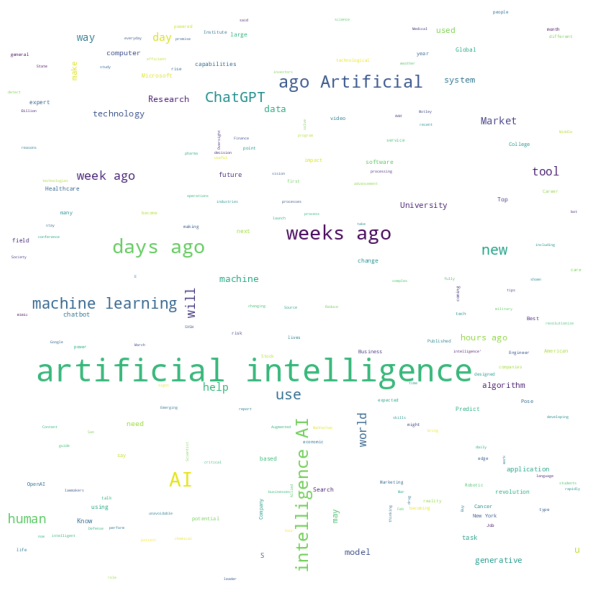

In [18]:
# Create one string
text = ' '.join(df['text'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=set(STOPWORDS)).generate(text)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)

plt.show()
  
# Show the plot
plt.show()

In [7]:
# authenticate
from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

# create, and save df
from gspread_dataframe import set_with_dataframe
title = 'links scraped from google'
gc.create(title)  # if not exist
sheet = gc.open(title).sheet1
set_with_dataframe(sheet, df) 